In [ ]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import sklearn.datasets #  sklearn datasets 
from sklearn.preprocessing import StandardScaler # We will be using the imbuilt scaling functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful


In [ ]:
import time
start = time.time()
from google.colab import files

uploaded = files.upload()  
end = time.time()
print('Execution time:', (end-start), 'seconds')

Saving TSLA.csv to TSLA.csv
Execution time: 13.329897165298462 seconds


In [ ]:
Data_csv = pd.read_csv('TSLA.csv')
df = pd.DataFrame(data= Data_csv) #created a dataframe
# show the data
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [ ]:
max = df['Volume'].max()
print(max)
min = df['Volume'].min()
print(min)
max = df['Close'].max()
print(max)
min = df['Close'].min()
print(min)

47065000
118500
780.0
15.8


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
# example of a ordinal encoding
from numpy import asarray


In [ ]:
enc = OrdinalEncoder()
df[["Date"]] = enc.fit_transform(df[["Date"]])
col = ['Volume',	'Open',	'High',	'Low'	]

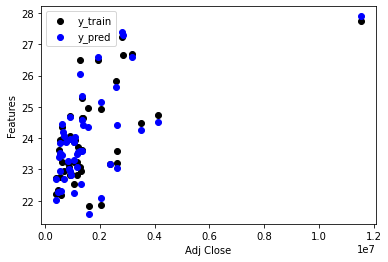

Mean squared error loss: 0.0627
R2 score: 0.9675
Execution time: 0.17726874351501465 seconds


In [ ]:
# Import time module

import time
start = time.time()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# prepare NumPy ndarrays
X = np.array(df[col])
y = np.array(df['Adj Close'])

n_train_points = 150
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]
X_new_disp = X_new[:,0]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Note, we don't actually have to do anything else with the model functions
# They are prefectly happy with multivariable linear regression
# Create linear regression object
obj = sklearn.linear_model.LinearRegression()
# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Plot the Age vs Diabetes
plt.scatter(X_new_disp, y_true,  color='black', label='y_train')
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred')
plt.xlabel('Adj Close')
plt.ylabel('Features')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))
end = time.time()
print('Execution time:', (end-start), 'seconds')